In [9]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Embedding, Dense, LSTM, Dropout, TimeDistributed, RepeatVector
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.losses import SparseCategoricalCrossentropy

In [10]:
df = pd.read_csv("./data/eng-french.csv")
df.head()

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [11]:
df.shape

(175621, 2)

In [12]:
eng = df["English words/sentences"]
fre = df["French words/sentences"]

In [13]:
eng_word_counter = Counter([word for sentence in eng for word in sentence.split()])
print("total count of English words",len([word for sentence in eng for word in sentence.split()

]))
print("count of distinct English words",len(eng_word_counter))
print("10 most common english words",list(zip(*eng_word_counter.most_common(10)))[0])

total count of English words 1082098
count of distinct English words 27393
10 most common english words ('I', 'to', 'you', 'the', 'a', 'is', 'Tom', 'of', 'in', 'have')


In [14]:
fre_word_counter = Counter([word for sentence in fre for word in sentence.split()])
print("total count of french words", len([word for sentence in fre for word in sentence.split()]))
print("total count of  distict english words", len(fre_word_counter))
print("10 most common french words",list(zip(*fre_word_counter.most_common(10)))[0])

total count of french words 1177832
total count of  distict english words 44918
10 most common french words ('de', 'Je', '?', 'pas', 'que', 'à', 'ne', 'la', 'le', 'Il')


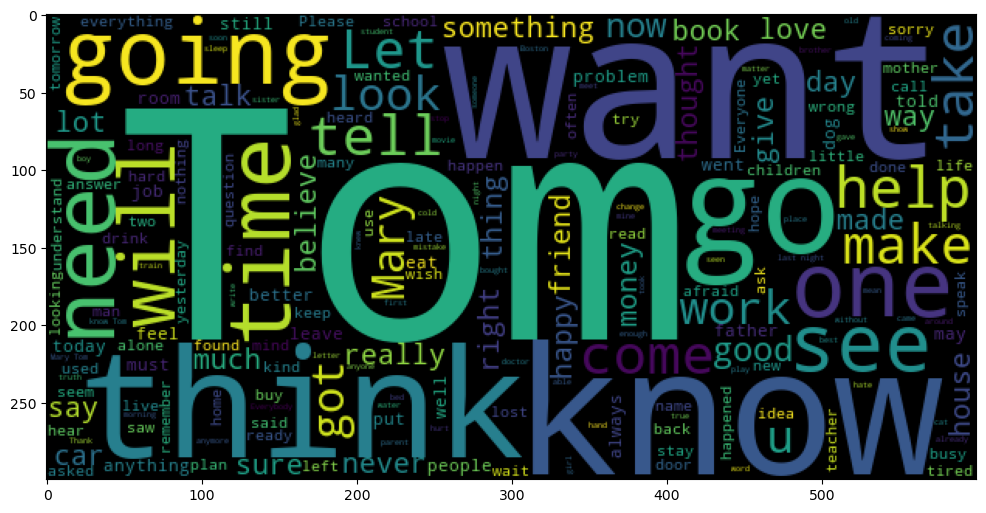

In [15]:
plt.figure(figsize=(12,12))
wc = WordCloud(width=600,height=300).generate(" ".join(eng))
plt.imshow(wc)
plt.show()

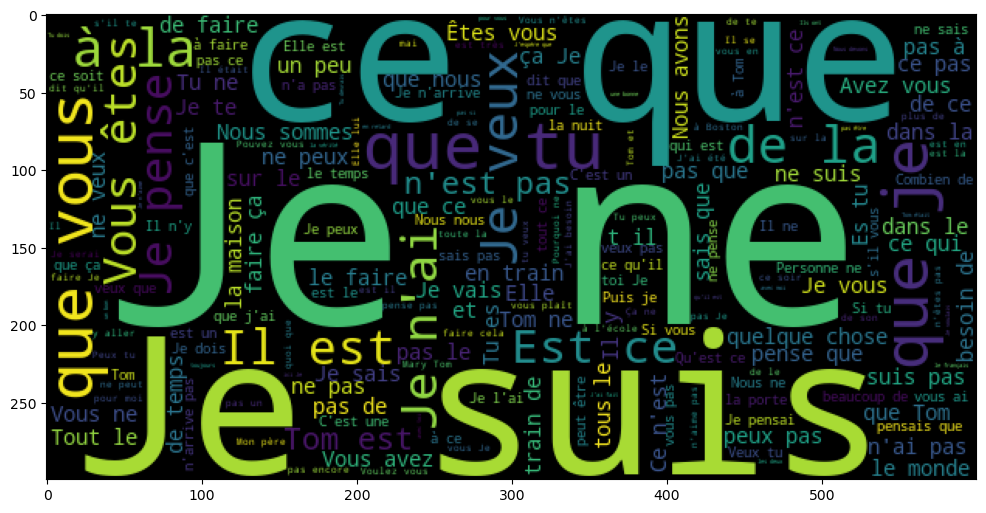

In [16]:
plt.figure(figsize=(12,12))
wc = WordCloud(width=600,height=300).generate(" ".join(fre))
plt.imshow(wc)
plt.show()

In [18]:
def create_tokenizer(sentences,num_words = None,oov_token = "<OOV>"):
    tokenizer = Tokenizer(num_words=num_words,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                         lower=True, 
                         split=' ',
                         oov_token=oov_token)
    tokenizer.fit_on_text(sentences)
    return tokenizer

In [19]:
def max_setence_length(lines):
    return max(len(sentence.split() for sentence in lines))